In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
dataset=pd.read_csv('Mall_Customers.csv')

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
x=dataset.iloc[:,[3,4]].values

In [5]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [6]:
from sklearn.cluster import MeanShift
from sklearn.datasets import make_blobs

In [7]:
X,_ = make_blobs(n_samples=200, centers=5,cluster_std=0.60, random_state=42)
mean_shift=MeanShift(bandwidth=25)
mean_shift.fit(x)

MeanShift(bandwidth=25)

In [8]:

labels = mean_shift.labels_
cluster_centers = mean_shift.cluster_centers_



In [9]:
n_clusters = len(np.unique(labels))
print(f"Number of clusters formed: {n_clusters}")


Number of clusters formed: 5


In [10]:
supervised=pd.DataFrame(dataset)
supervised['Cluster_group']=mean_shift
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,MeanShift(bandwidth=25)
1,2,Male,21,15,81,MeanShift(bandwidth=25)
2,3,Female,20,16,6,MeanShift(bandwidth=25)
3,4,Female,23,16,77,MeanShift(bandwidth=25)
4,5,Female,31,17,40,MeanShift(bandwidth=25)
...,...,...,...,...,...,...
195,196,Female,35,120,79,MeanShift(bandwidth=25)
196,197,Female,45,126,28,MeanShift(bandwidth=25)
197,198,Male,32,126,74,MeanShift(bandwidth=25)
198,199,Male,32,137,18,MeanShift(bandwidth=25)


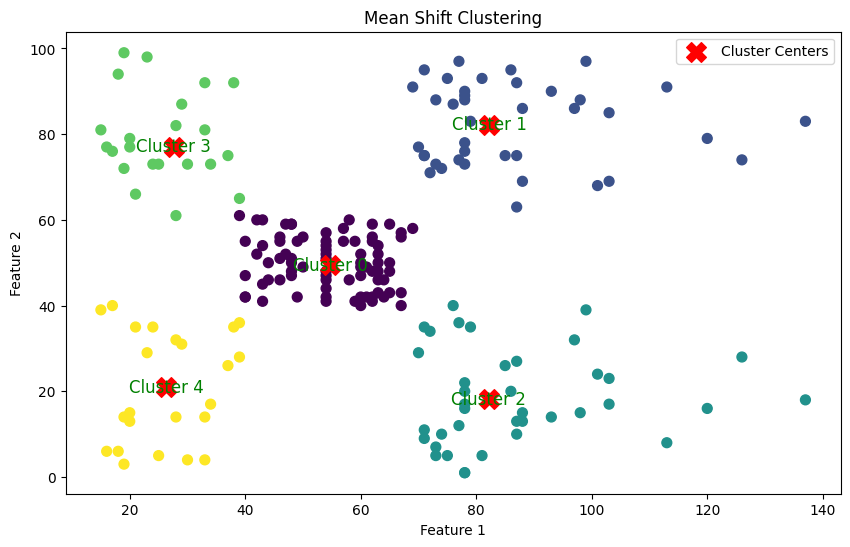

In [11]:


         
             plt.figure(figsize=(10, 6))
             plt.scatter(x[:, 0], x[:, 1], c=labels,  marker='o',s=50)
             plt.scatter(cluster_centers [:, 0],cluster_centers [:, 1], c='red', marker='X', s=200, label='Cluster Centers')
             for i, center in enumerate(cluster_centers):
                 plt.text(center[0], center[1], f'Cluster {i}', fontsize=12, color='green', ha='center', va='center')

            
             plt.title("Mean Shift Clustering")
             plt.xlabel("Feature 1")
             plt.ylabel("Feature 2")
             plt.legend()
             plt.show()
